<a href="https://colab.research.google.com/github/JuanCervigon/master2025/blob/main/kmeans_jerarquico_dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kmeans, jerarquico y bdscan


# kmeans

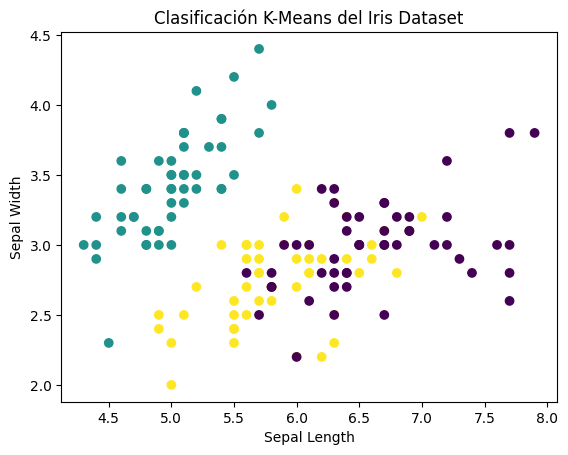

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el dataset Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Aplicar K-means
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster_kmeans'] = kmeans.fit_predict(df)

# Visualizar los datos
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster_kmeans'], cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Clasificación K-Means del Iris Dataset')
plt.show()

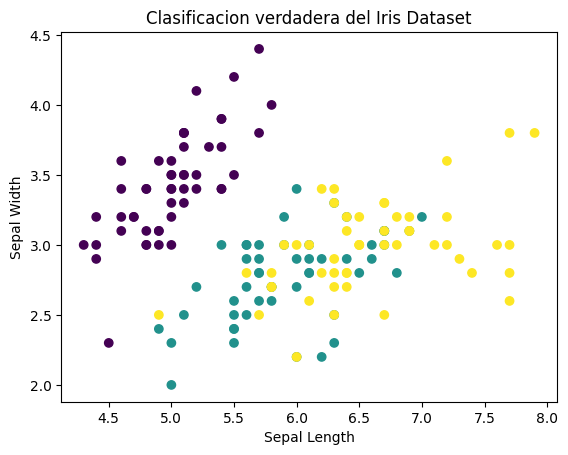

In [ ]:
# Visualizar los datos
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['target'], cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Clasificacion "verdadera" del dataset Iris')
plt.show()

# jerarquico

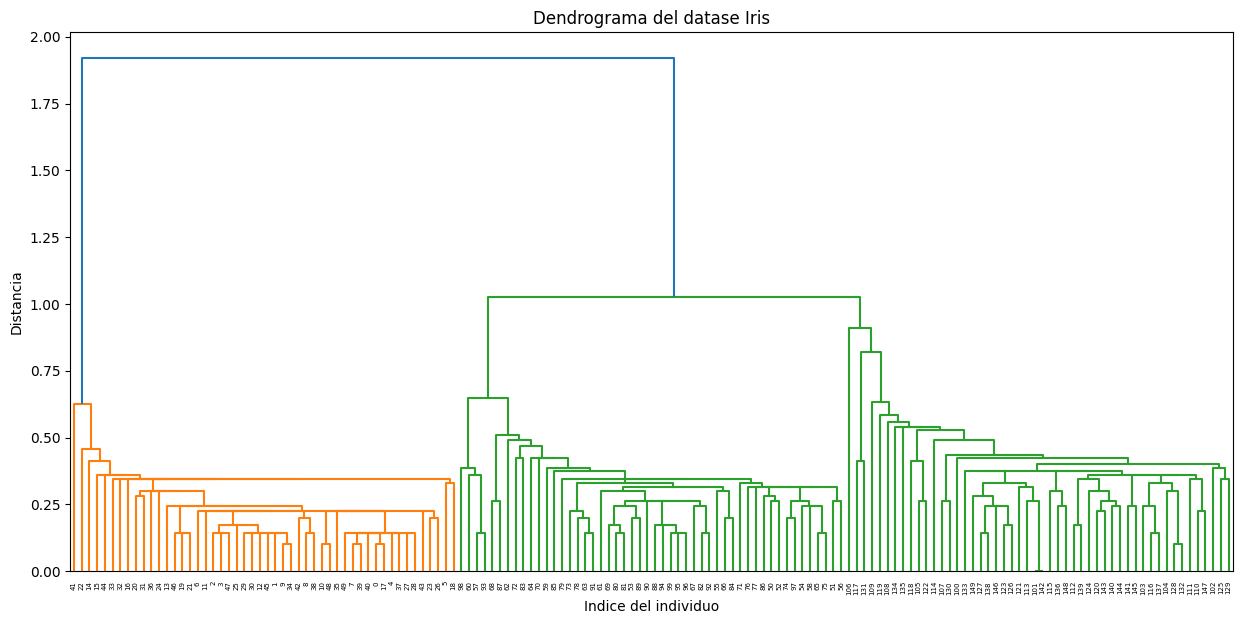

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# Crear la matriz de distancias
Z = linkage(df.iloc[:, :-1], method='single')

# Hacer el dendrograma
plt.figure(figsize=(15, 7))
dendrogram(Z)
plt.title('Dendrograma del datase Iris')
plt.xlabel('Indice del individuo')
plt.ylabel('Distancia')
plt.show()

# DBSCAN

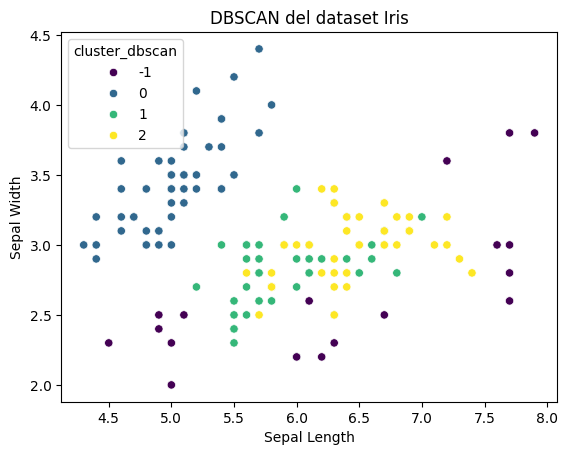

In [ ]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['cluster_dbscan'] = dbscan.fit_predict(df.iloc[:, :-1])

# Visualizar los clusters
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['cluster_dbscan'], palette='viridis')
plt.title('DBSCAN del dataset Iris')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster_kmeans
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0
